## Manually colapse the events in images 

Collapse the events in the frames to get the most active pixels and get an 'artificial brightnest' of the image 


In [1]:
# Get system path 
import os
path = os.getcwd()
# Get parent directory
parent = os.path.dirname(path)
#Add parent directory to system path
os.sys.path.insert(0, parent)

from metavision_core.event_io import EventsIterator
import numpy as np
import matplotlib.pyplot as plt

from lib.utils import *
from lib.plot_utils import *   
from lib.event_processing import *

from metavision_core.event_io import EventsIterator
from metavision_sdk_core import PeriodicFrameGenerationAlgorithm
from metavision_sdk_ui import EventLoop, BaseWindow, Window, UIAction, UIKeyEvent

import cv2

In [2]:
#Dynamicaly reload modules in juptyer notebook
%load_ext autoreload 
%autoreload 2

## SUN CALIBRATION


In [3]:
path = "../data/sun_calibration_FOV_2_25-01.raw"
mv_iterator = EventsIterator(input_path=path, delta_t=1000)

height, width = mv_iterator.get_size()  # Camera Geometry
event_frame_gen = PeriodicFrameGenerationAlgorithm(width, height, accumulation_time_us=10000)

frames = []

def on_cd_frame_cb(ts, cd_frame):
    # window.show(cd_frame)
    frames.append(cd_frame)


event_frame_gen.set_output_callback(on_cd_frame_cb)

for evs in mv_iterator:
    event_frame_gen.process_events(evs)

print(len(frames))


715


In [42]:
from lib.event_processing import *  


max_buffer = len(frames)
blend = np.array(np.zeros((cv2.cvtColor(np.array(frames[0]), cv2.COLOR_BGR2GRAY).shape)))
copact_frames = []
count = 0
frames_buffer = []


for frame in frames:
    frames_buffer.append(frame)

    if len(frames_buffer) == max_buffer:
        blend = calibration_blend(frames_buffer)
        # blend = blend_buffer(frames_buffer)

        copact_frames.append(blend.astype(np.uint8))
        frames_buffer = []

print(len(copact_frames))

1


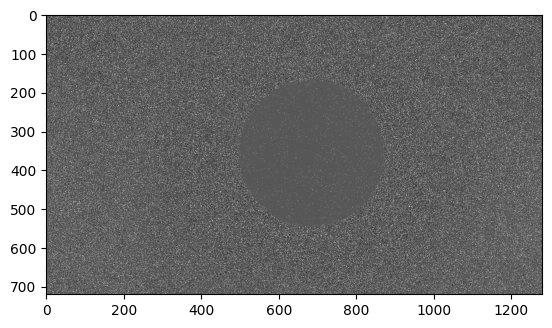

In [43]:
plot_image(copact_frames[0])

original


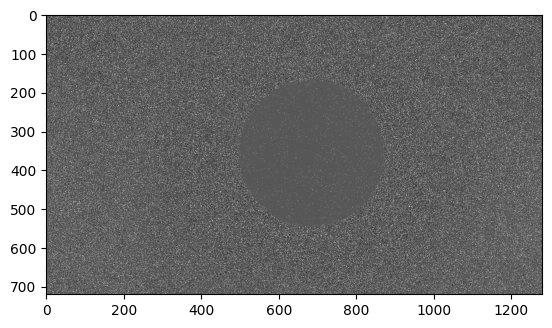

0


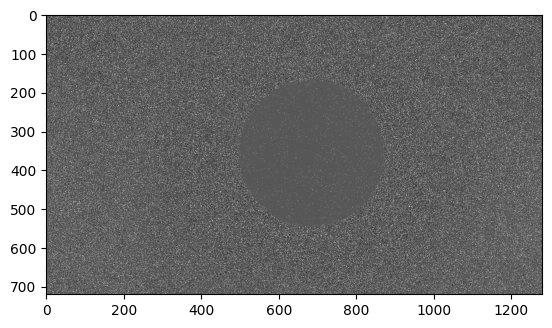

25


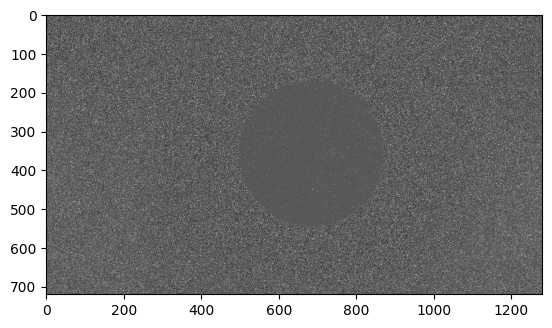

50


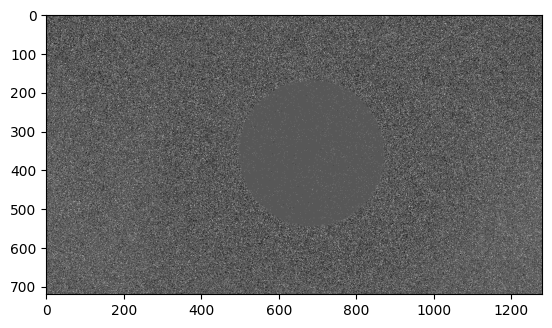

75


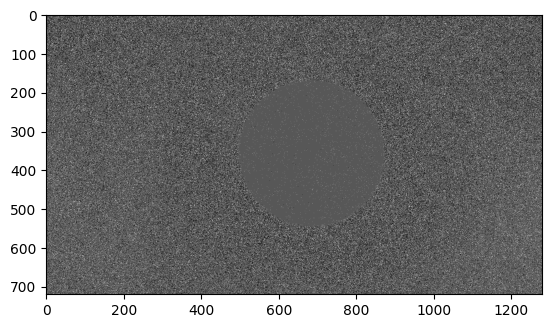

100


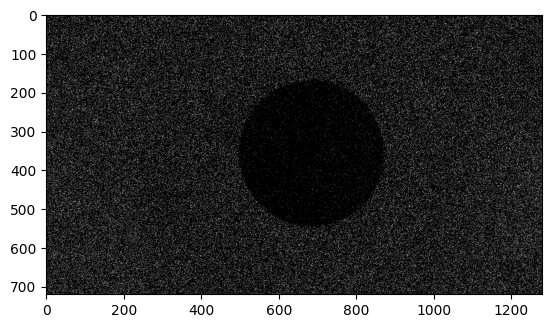

125


150


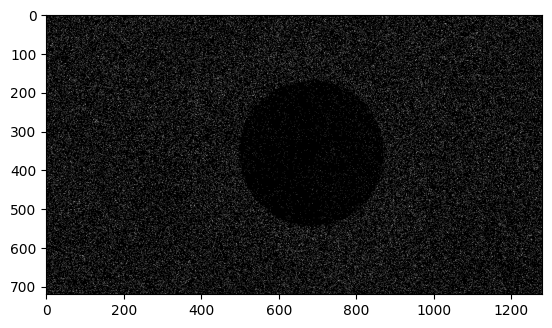

175


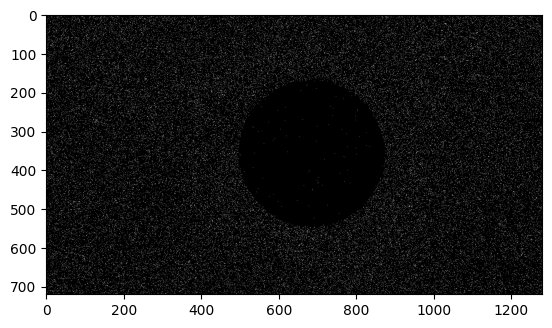

200


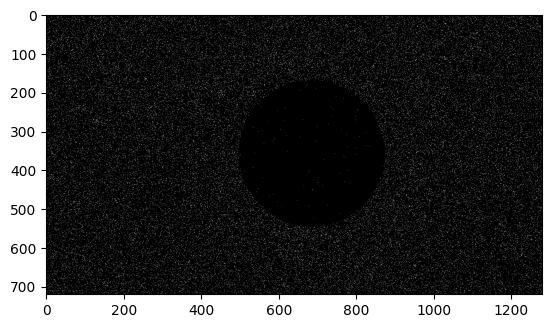

225


In [35]:
print('original')
frame =copact_frames[0]
plot_image(np.array(frame))

for threshold in range(0,250,25):
    print(threshold)
    frame_thr = cv2.threshold(frame, threshold, 1, cv2.THRESH_TOZERO)[1]
    plot_image(frame_thr)   



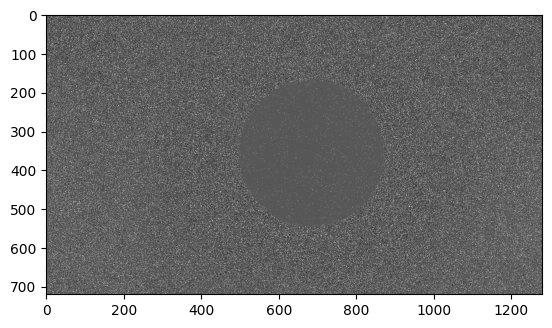

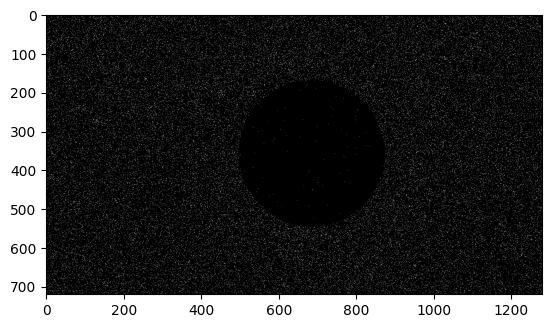

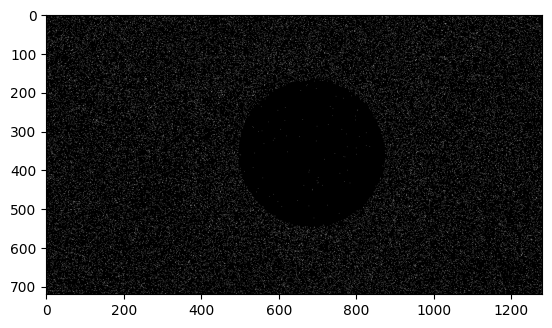

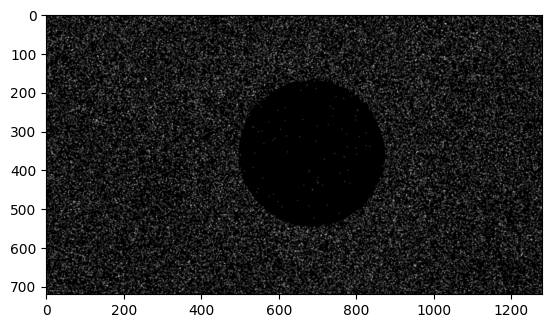

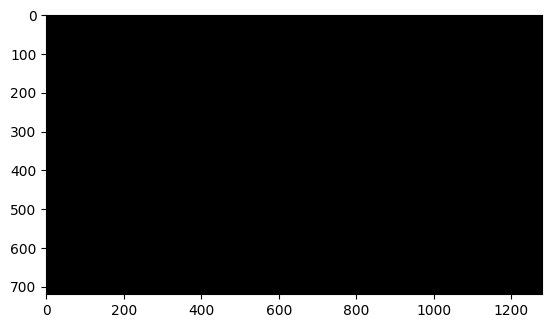

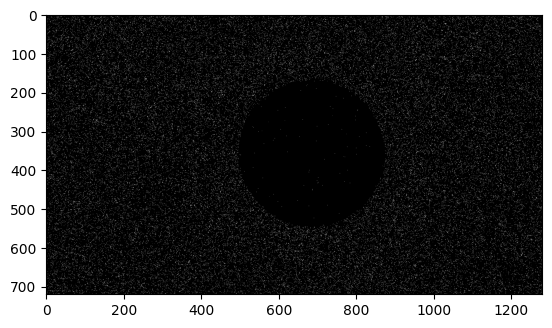

In [31]:
#Plor one frame as an example

frame =copact_frames[0]
plot_image(np.array(frame))

frame_thr = cv2.threshold(frame, 200, 1, cv2.THRESH_TOZERO)[1]
plot_image(frame_thr)

#Soften the image
dst = cv2.fastNlMeansDenoising(frame_thr)
plot_image(dst)

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(frame_thr,-1,kernel)
plot_image(dst)


blur = cv2.GaussianBlur(frame_thr,(5,5),0)
plot_image(blur)
# Threshold filter

median = cv2.medianBlur(frame_thr,9)
plot_image(median)

blur = cv2.bilateralFilter(frame_thr,9,75,75)
plot_image(blur)


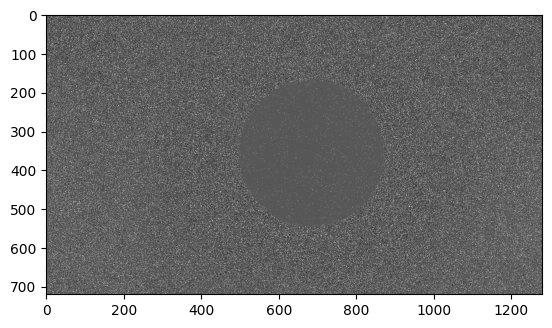

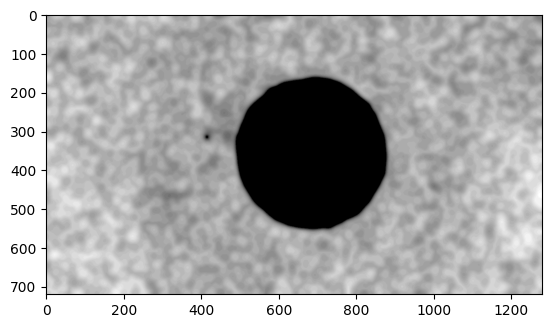

In [65]:
#Plor one frame as an example

frame =copact_frames[0]
plot_image(np.array(frame))

frame = cv2.threshold(frame, 100, 1, cv2.THRESH_TOZERO)[1]


for i in range(50):

    # plot_image(frame_thr)

    frame = cv2.blur(frame,(5,5))

    frame = cv2.threshold(frame, 5, 1, cv2.THRESH_TOZERO)[1]


    # kernel = np.ones((5,5),np.float32)/25
    # frame = cv2.filter2D(frame_thr,-1,kernel)

    # frame = cv2.medianBlur(frame_thr,9)

plot_image(frame)

    # #Soften the image
    # dst = cv2.fastNlMeansDenoising(frame_thr)
    # plot_image(dst)

    # kernel = np.ones((5,5),np.float32)/25
    # dst = cv2.filter2D(frame_thr,-1,kernel)
    # plot_image(dst)


    # blur = cv2.GaussianBlur(frame_thr,(5,5),0)
    # plot_image(blur)
    # # Threshold filter

    # median = cv2.medianBlur(frame_thr,9)
    # plot_image(median)

    # blur = cv2.bilateralFilter(frame_thr,9,75,75)
    # plot_image(blur)


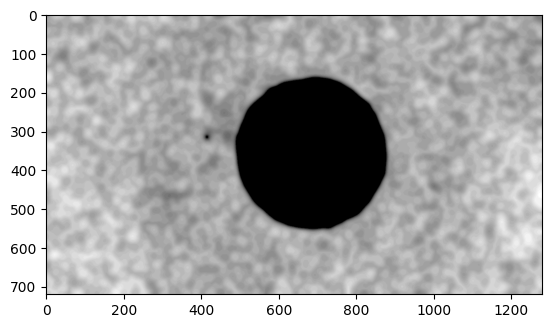

Circle center: (692, 352) , radius: 201


In [71]:


# gray = cv2.cvtColor(copact_frames[0], cv2.GRAY2RGB)
plot_image(frame)

output = cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB)
gray =  frame


# detect circles in the image
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 100,
						   param1=30,param2=30,minRadius=20,maxRadius=600)
# ensure at least some circles were found
if circles is not None:
	# convert the (x, y) coordinates and radius of the circles to integers
	circles = np.round(circles[0, :]).astype("int")
	# loop over the (x, y) coordinates and radius of the circles
	
    # r = circles[0][2]

	for (x, y, r) in circles:
		# draw the circle in the output image, then draw a rectangle
		# corresponding to the center of the circle
		cv2.circle(output, (x, y), r, (0, 255, 0), 4)
		cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

		print(f"Circle center: {x,y} , radius: {r}")
	# show the output image
	cv2.imshow("output", output)
	cv2.waitKey(0)
	cv2.destroyAllWindows()
else:
	print("No circles found")